## Example to create 

In [1]:
#!/usr/bin/env python3

#-- code from https://github.com/NCAR/VAPOR/blob/readTheDocs/docs/data/regularToCF.py

#-- to split a cell in Google Colab, use Ctrl + M + - (⌘ + M + - on Mac)

import xarray as xr
import numpy as np

# These are to download the sample data
from pathlib import Path
from google_drive_downloader import GoogleDriveDownloader as gdd


In [3]:

# Download the sample data from google drive
home = str(Path.home())
simpleNC = home + "/simple1.nc"
gdd.download_file_from_google_drive(file_id='18CFrtFxvHwfL30Xd91TNU38J_z-Kgywm',
                                     dest_path=simpleNC,
                                     unzip=False)
from google.colab import files
files.download(simpleNC)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:

ds = xr.open_dataset(simpleNC)

ds.info()



xarray.Dataset {
dimensions:
	time = 1 ;
	x = 48 ;
	y = 48 ;
	z = 24 ;

variables:
	float64 temperature(time, z, y, x) ;

// global attributes:
}

# Neuer Abschnitt

xarray.Dataset {
dimensions:
	time = 1 ;
	x = 48 ;
	y = 48 ;
	z = 24 ;

variables:
	float64 temperature(time, z, y, x) ;
	float64 time(time) ;
	float64 y(y) ;
	float64 x(x) ;
	float64 z(z) ;

// global attributes:
}xarray.Dataset {
dimensions:
	time = 1 ;
	x = 48 ;
	y = 48 ;
	z = 24 ;

variables:
	float64 temperature(time, z, y, x) ;
		temperature:units = K ;
	float64 time(time) ;
		time:axis = T ;
		time:units = seconds since 2000-0101 ;
	float64 y(y) ;
		y:axis = Y ;
		y:units = m ;
	float64 x(x) ;
		x:axis = X ;
		x:units = m ;
	float64 z(z) ;
		z:axis = Z ;
		z:units = m ;

// global attributes:
}

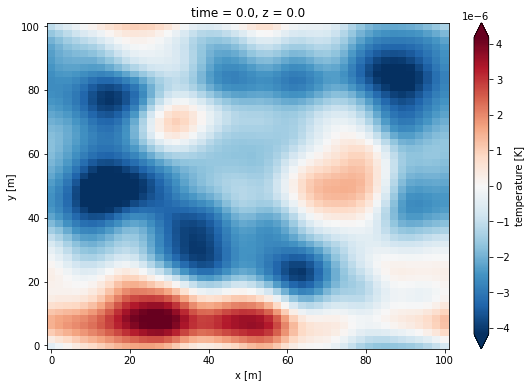

In [5]:

ds['time'] = np.linspace(start=0, stop=0, num=1);
  
# Generate coordinates for x, y, z dimensions using numpy's linspace 
# https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
  
ds['y'] = np.linspace(start=0, stop=100, num=48)
ds['x'] = np.linspace(start=0, stop=100, num=48)
ds['z'] = np.linspace(start=0, stop=50, num=24)

ds.info() 

ds.time.attrs['axis']      = 'T'
ds.x.attrs['axis']         = 'X'
ds.y.attrs['axis']         = 'Y'
ds.z.attrs['axis']         = 'Z'

ds.time.attrs['units']     = 'seconds since 2000-0101'
ds.x.attrs['units']        = 'm'
ds.y.attrs['units']        = 'm'
ds.z.attrs['units']        = 'm'

ds.temperature.attrs['units'] = 'K'

ds.info()

ds.to_netcdf( home + "/regularCompliant.nc")

ds.isel(time=0, z=0).temperature.plot(size=6, robust=True);